In [1]:
!pip install yfinance   #Historical market data for stocks, funds, and other securities from Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings   #Control the display of warnings that are generated by the interpreter or other libraries

#warnings.filterwarnings() function to filter out certain types of warnings or to control 
#whether warnings are displayed to the user or not.
warnings.filterwarnings('ignore')

ERROR: Invalid requirement: '#Historical'


# Data Ingestion

In [2]:
df = yf.download("ADANIENT.NS", start="2020-01-01", end="2023-05-30")
df=df.round(2)

[*********************100%***********************]  1 of 1 completed


# Top 5 rows of dataframe

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421
2020-01-06,207.75,207.75,197.75,199.55,197.89,4353179
2020-01-07,200.55,205.70,200.55,204.05,202.35,2966120


# Bottom 5 rows of dataframe

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-23,2410.9,2759.45,2400.00,2633.70,2633.70,28432888
2023-05-24,2709.0,2750.00,2425.35,2475.60,2475.60,23465761
2023-05-25,2440.0,2558.80,2386.65,2537.45,2537.45,8434009
2023-05-26,2565.0,2599.95,2535.15,2544.35,2544.35,3963515
2023-05-29,2570.0,2583.50,2523.00,2534.05,2534.05,2779432


# Shape of the dataframe

In [5]:
df.shape

(846, 6)

# List of columns in the dataframe

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Checking duplicate

In [7]:
df.duplicated().sum()

0

# Checking Null

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Basic information about the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 846 entries, 2020-01-01 to 2023-05-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       846 non-null    float64
 1   High       846 non-null    float64
 2   Low        846 non-null    float64
 3   Close      846 non-null    float64
 4   Adj Close  846 non-null    float64
 5   Volume     846 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 46.3 KB


# Basic statistics about the dataframe

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,846.000000,846.000000,846.000000,846.000000,846.000000,8.460000e+02
mean,1489.817494,1519.297991,1457.045508,1488.854965,1488.281761,5.036237e+06
std,1115.885678,1131.262103,1094.880577,1112.936569,1113.119865,5.649282e+06
min,121.000000,129.800000,116.400000,120.900000,120.770000,2.482490e+05
25%,346.000000,354.125000,341.375000,351.912500,351.532500,1.803547e+06
50%,1511.875000,1547.975000,1476.100000,1516.675000,1516.035000,3.215224e+06
75%,2077.750000,2133.250000,2006.037500,2062.925000,2062.047500,5.655948e+06
max,4175.000000,4190.000000,4066.400000,4165.300000,4165.300000,4.926454e+07


# Checking unique and making Date as index to perform our analysis

In [11]:
df.nunique()
df['Date'] = df.index

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127,2020-01-01
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937,2020-01-02
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421,2020-01-03
2020-01-06,207.75,207.75,197.75,199.55,197.89,4353179,2020-01-06
2020-01-07,200.55,205.70,200.55,204.05,202.35,2966120,2020-01-07
...,...,...,...,...,...,...,...
2023-05-23,2410.90,2759.45,2400.00,2633.70,2633.70,28432888,2023-05-23
2023-05-24,2709.00,2750.00,2425.35,2475.60,2475.60,23465761,2023-05-24
2023-05-25,2440.00,2558.80,2386.65,2537.45,2537.45,8434009,2023-05-25


# Cheking range of date

In [13]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-01 00:00:00
Ending date:  2023-05-29 00:00:00
Duration:  1244 days 00:00:00


# Creating monthvise data

In [14]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [15]:
monthvise

,Open,Close
Date,,
February,1108.796203,1091.821519
March,1163.508929,1167.723214
June,1284.721212,1285.371212
July,1289.846154,1291.502308
April,1332.254795,1336.728767
May,1446.216250,1445.220625
January,1501.656548,1490.852976
August,1508.315323,1519.850000
October,1667.537500,1660.111667


# Potting monthvise data

Text(0.5, 1.0, 'Monthwise comparision between Stock open and close price')

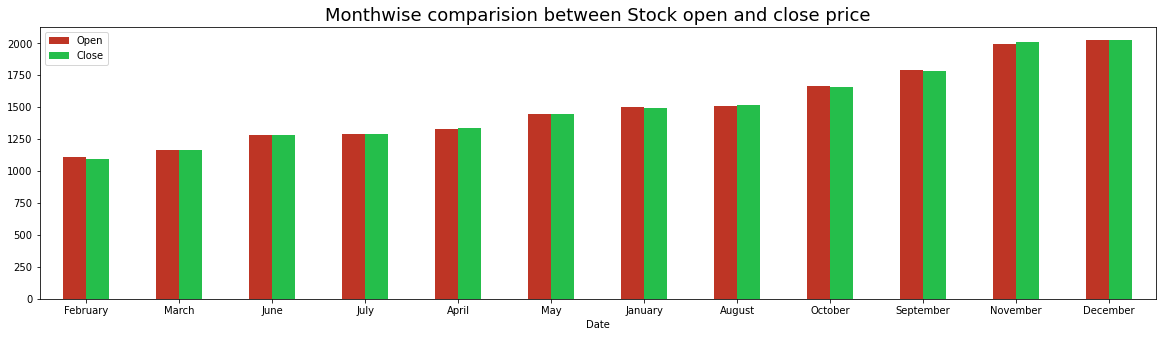

In [16]:
monthvise.plot.bar(rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise comparision between Stock open and close price", fontsize = 18)

In [17]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Minimum low price in each month

In [18]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        128.00
August       171.20
December     395.10
February     215.60
January      194.55
July         145.20
June         141.00
March        116.40
May          127.30
November     333.05
October      296.00
September    257.50
Name: Low, dtype: float64

# Maximum low price in each month

In [19]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        2336.30
August       3161.00
December     4066.40
February     1941.20
January      3822.55
July         2560.00
June         2207.05
March        1991.00
May          2535.15
November     4022.00
October      3326.10
September    3812.00
Name: Low, dtype: float64

# Minimum high price in each month

In [20]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        134.60
August       178.70
December     423.95
February     224.65
January      203.55
July         150.00
June         148.45
March        129.80
May          135.40
November     344.30
October      311.95
September    281.25
Name: High, dtype: float64

# Maximum high price in each month

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2420.95
August       3263.10
December     4190.00
February     3010.75
January      3880.00
July         2622.00
June         2274.00
March        2135.00
May          2759.45
November     4096.00
October      3460.05
September    3885.00
Name: High, dtype: float64

In [22]:
monthvise['monthvise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise['monthvise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price')

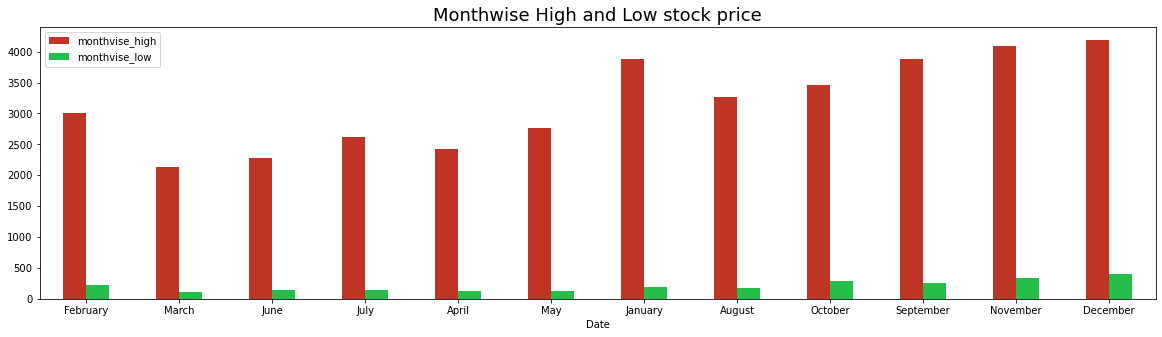

In [23]:
monthvise[['monthvise_high', 'monthvise_low']].plot.bar(rot=0, color={"monthvise_high": "#BE3525", "monthvise_low":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise High and Low stock price", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart')

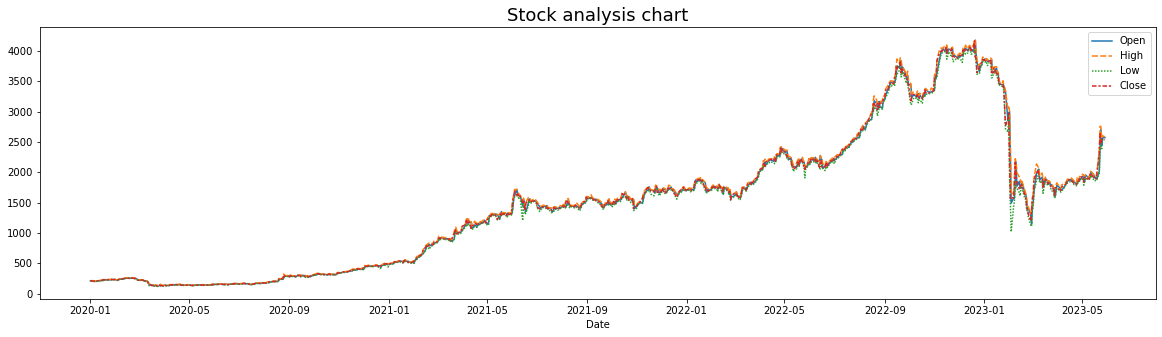

In [24]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart",fontsize=18)

In [25]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (846, 2)


Text(0.5, 1.0, 'Stock close price chart')

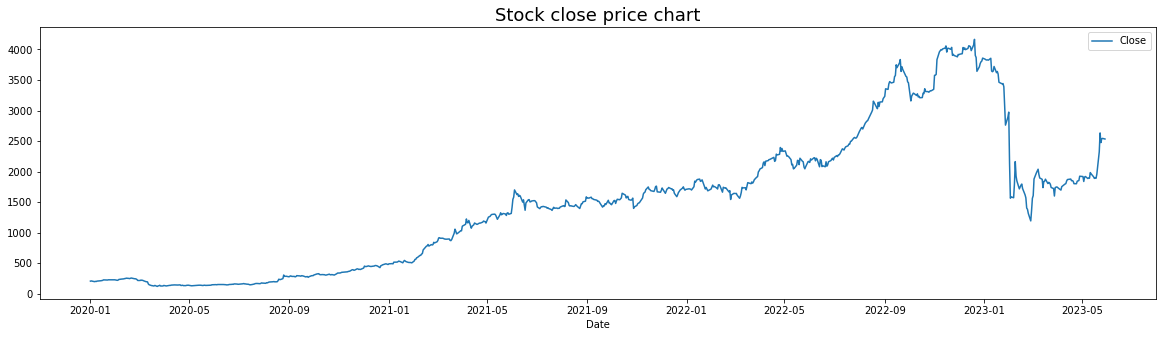

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

# Model Creation

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Scaling MinMaxScaler

In [29]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(846, 1)


In [30]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (634, 1)
test_data:  (212, 1)


# convert an array of values into a dataset matrix

In [31]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]      ###i=0, 0,1,2,3-----99 100 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (618, 15)
y_train:  (618,)
X_test:  (196, 15)
y_test (196,)


# Support Vector Regressor

In [33]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [34]:
#Lets Do the prediction 
train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)
print(train_predict.shape)
print(test_predict.shape)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(618,)
(196,)
Train data prediction: (618, 1)
Test data prediction: (196, 1)


In [35]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))
print(original_ytrain.shape)
print(original_ytest.shape)

(618, 1)
(196, 1)
(618, 1)
(196, 1)


In [36]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  222.87885775990114
Train data MSE:  49674.98523635825
Test data MAE:  183.75096816657592
---------------------------------------------------------------------------------------------------------
Test data RMSE:  968.1841200814134
Test data MSE:  937380.4903778207
Test data MAE:  800.7069272973738
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9228915002034646
Test data explained variance regression score: 0.5051153165836618
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9074463960314156
Test data R2 score: -0.1413226198232611
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.2567780622757286
Test data M

Text(0.5, 1.0, 'Stock close price chart')

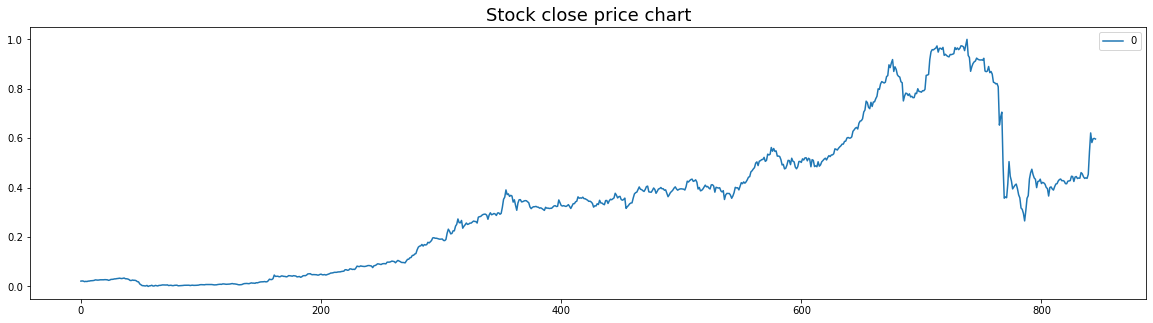

In [37]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

Train predicted data:  (846, 1)
Test predicted data:  (846, 1)


Text(0.5, 1.0, 'Stock close price chart')

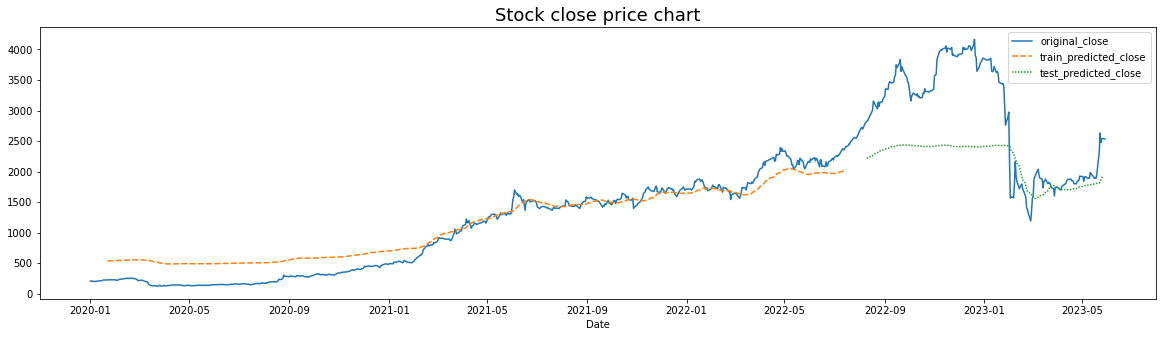

In [38]:
 # shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart",fontsize=18)

In [39]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.43892790030659673,
 0.437951241222431,
 0.460822371674414,
 0.455889625160716,
 0.4438606468202947,
 0.4372094748293937,
 0.43976856888537236,
 0.4374196419740876,
 0.4537508653941252,
 0.5452477499752744,
 0.6213035308080308,
 0.5822124418949659,
 0.5975051923647512,
 0.599211255068737,
 0.5966645237859758]

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.43892790030659673,
 0.437951241222431,
 0.460822371674414,
 0.455889625160716,
 0.4438606468202947,
 0.4372094748293937,
 0.43976856888537236,
 0.4374196419740876,
 0.4537508653941252,
 0.5452477499752744,
 0.6213035308080308,
 0.5822124418949659,
 0.5975051923647512,
 0.599211255068737,
 0.5966645237859758]

In [41]:
 # CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
     #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
 
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
 
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = svr_rbf.predict(x_input)
 
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
 
        i=i+1
    
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output) 

Output of predicted next days:  10
Output of predicted next days:  [0.45886620222466484, 0.4592367113004078, 0.4595426220098531, 0.4591030744551195, 0.45918251495316803, 0.45961797719358866, 0.4600422353861045, 0.46064610387457283, 0.4610231746591603, 0.46063938879958527]


In [42]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

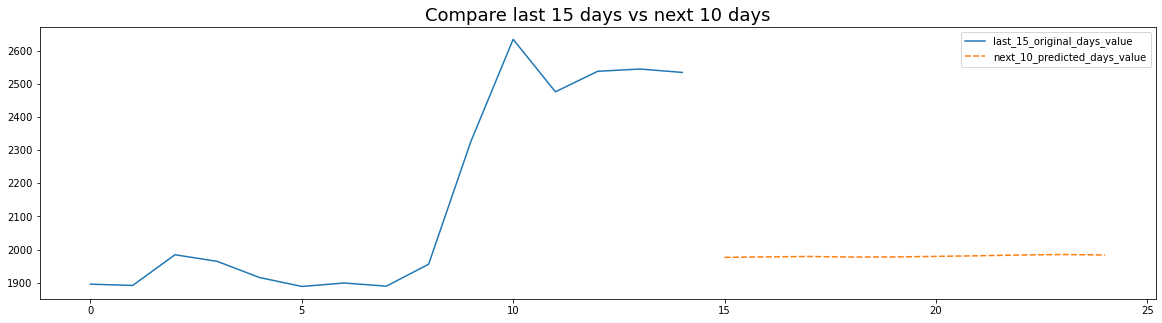

In [43]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()
# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
 'last_15_original_days_value':last_original_days_value,
 'next_10_predicted_days_value':next_predicted_days_value
})
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

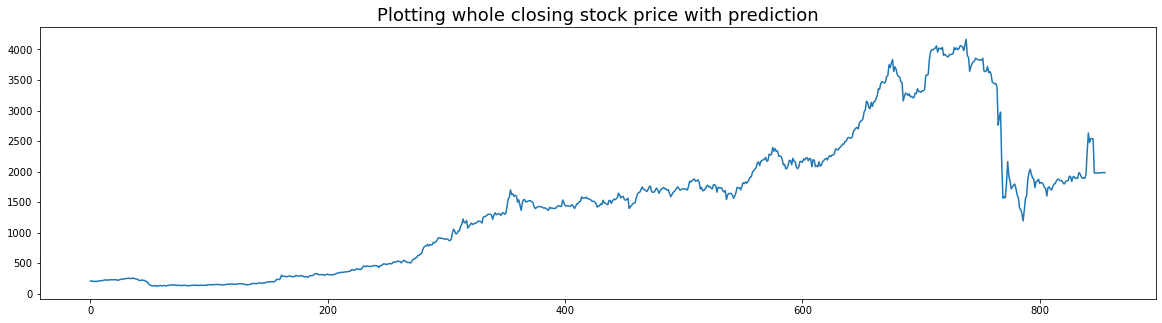

In [44]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]
plt.figure(figsize=(20,5))
sns.lineplot(data=svrdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

# Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
# Lets Do the prediction 
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (618, 1)
Test data prediction: (196, 1)


In [47]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [48]:
 # Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  13.752153522208209
Train data MSE:  189.12172649838365
Test data MAE:  8.476694174757332
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1025.4203867543633
Test data MSE:  1051486.969571468
Test data MAE:  807.5898852040823
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9996477606200117
Test data explained variance regression score: 0.4211574061717904
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9996476315535294
Test data R2 score: -0.28025478996007536
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.00016561637472158354
Test 

Train predicted data:  (846, 1)
Test predicted data:  (846, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

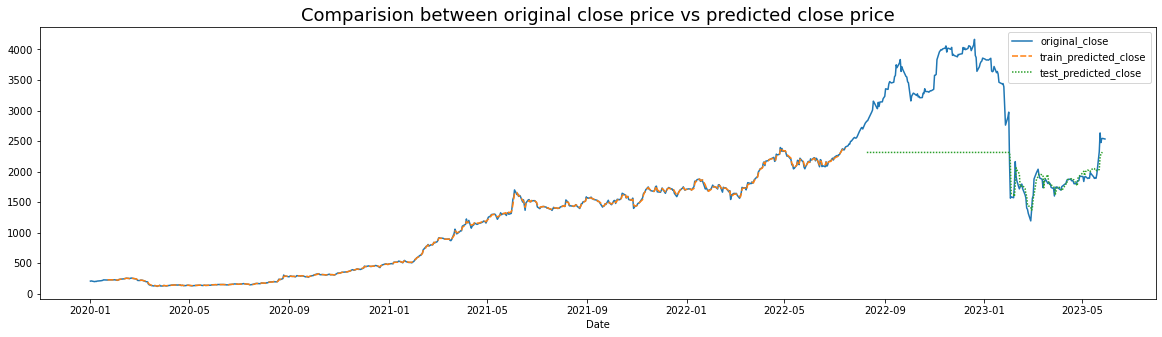

In [49]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [50]:
# Creating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
       #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
 
        yhat = regressor.predict(x_input)
     #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
 
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = regressor.predict(x_input)
 
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
 
        i=i+1

print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.5399906042923545, 0.5393995401048362, 0.5392974235980614, 0.5400715804569279, 0.5485062061121548, 0.5502470082088813, 0.5515007170408465, 0.5528893037286123, 0.5532153100583521, 0.545865517752942]


In [51]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

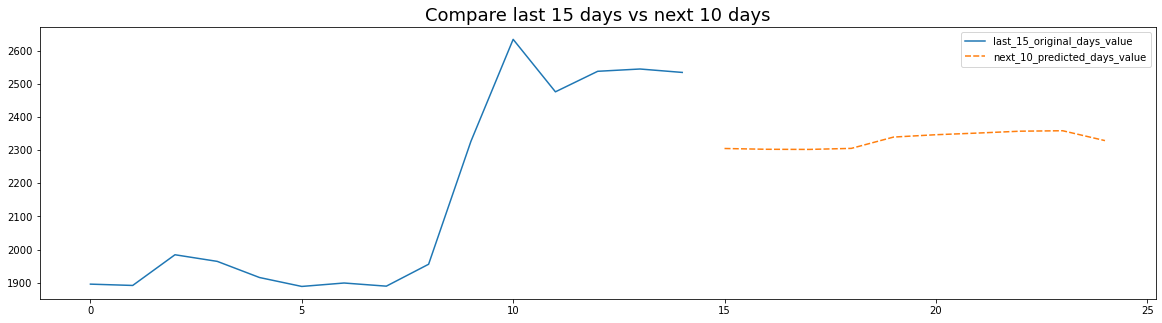

In [52]:
#Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()
# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
 'last_15_original_days_value':last_original_days_value,
 'next_10_predicted_days_value':next_predicted_days_value
})
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

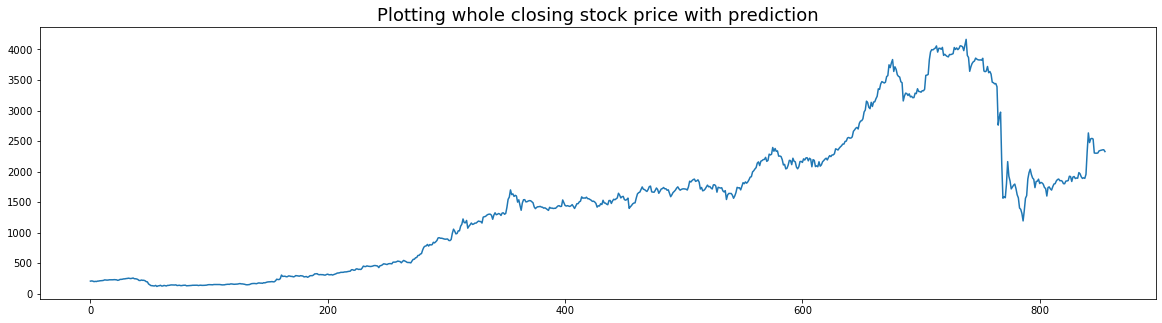

In [53]:
# Creating list of close price
rfdf=closedf.tolist()
# Adding next 10 days prediction
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]
plt.figure(figsize=(20,5))
sns.lineplot(data=rfdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

# K Nearest Neighbors (KNN)

In [54]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [55]:
# Lets Do the prediction 
train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (618, 1)
Test data prediction: (196, 1)


In [56]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [57]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  43.501215521131066
Train data MSE:  1892.3557518158943
Test data MAE:  28.185339805825254
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1092.268059716407
Test data MSE:  1193049.5142766444
Test data MAE:  880.5576530612245
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9965040894125486
Test data explained variance regression score: 0.3369904758127732
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.996474194325617
Test data R2 score: -0.45261653212374875
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0023334288085206235
Test d

Train predicted data:  (846, 1)
Test predicted data:  (846, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

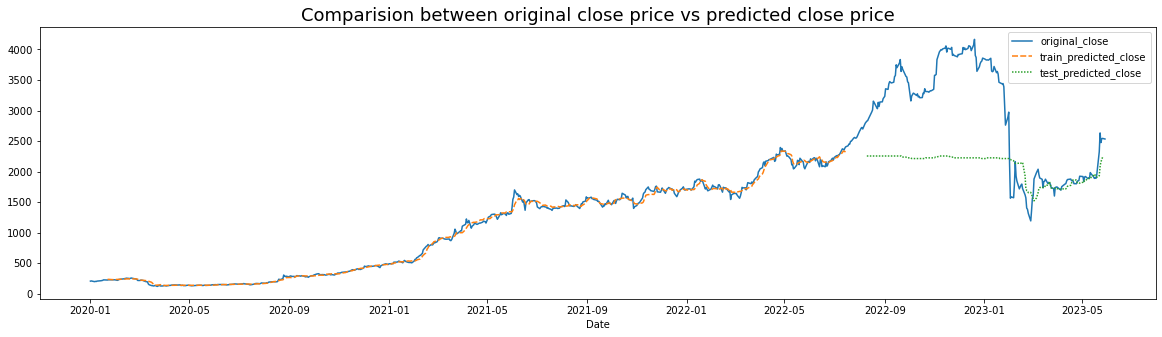

In [58]:
 # shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [59]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
         #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
 
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
 
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
 
        i=i+1
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.5320335937757558, 0.5353113770480994, 0.5395410938581743, 0.538524049714832, 0.5366292486730624, 0.5324465104012132, 0.5278318992516401, 0.5234249826921175, 0.5140218573830482, 0.5085426762931461]


In [60]:
 # Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

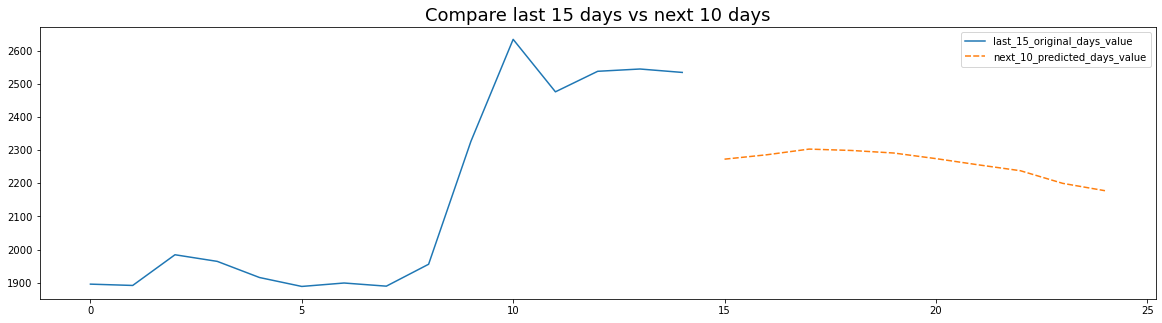

In [61]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()
# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
 'last_15_original_days_value':last_original_days_value,
 'next_10_predicted_days_value':next_predicted_days_value
})
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

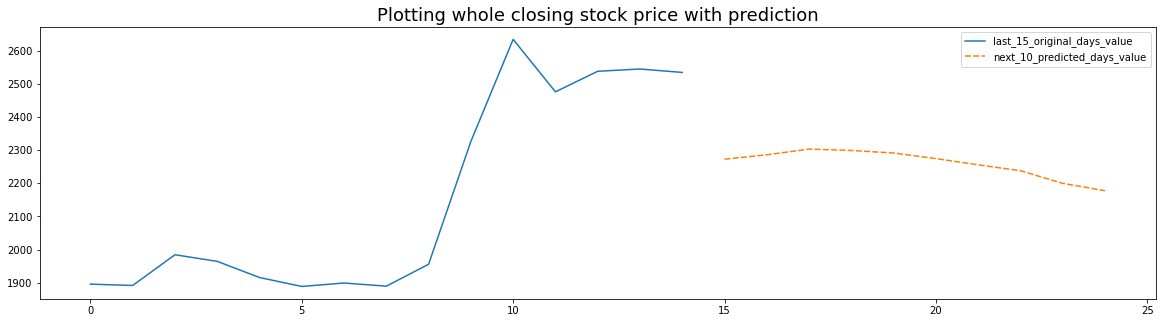

In [62]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

# Long short-term memory (LSTM)

In [63]:
#reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (618, 15, 1)
X_test:  (196, 15, 1)


In [64]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Epoch
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
124/124 [==============================] - 22s 58ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 2/10
124/124 [==============================] - 4s 31ms/step - loss: 4.9411e-04 - val_loss: 0.0105
Epoch 3/10
124/124 [==============================] - 3s 24ms/step - loss: 5.0461e-04 - val_loss: 0.0104
Epoch 4/10
124/124 [==============================] - 3s 24ms/step - loss: 5.3474e-04 - val_loss: 0.0126
Epoch 5/10
124/124 [==============================] - 3s 24ms/step - loss: 6.6021e-04 - val_loss: 0.0130
Epoch 6/10
124/124 [==============================] - 3s 24ms/step - loss: 5.0765e-04 - val_loss: 0.0102
Epoch 7/10
124/124 [==============================] - 3s 26ms/step - loss: 4.6280e-04 - val_loss: 0.0108
Epoch 8/10
124/124 [==============================] - 4s 28ms/step - loss: 5.1735e-04 - val_loss: 0.0114
Epoch 9/10
124/124 [==============================] - 4s 31ms/step - loss: 5.3731e-04 - val_loss: 0.0140
Epoch 10/10
124/124 [==============================] - 3s 

In [67]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 [==============================] - 0s 9ms/step


((618, 1), (196, 1))

In [68]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [69]:
 # Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  73.22301998532637
Train data MSE:  5361.610655771507
Test data MAE:  54.804793299208974
---------------------------------------------------------------------------------------------------------
Test data RMSE:  393.69396216378436
Test data MSE:  154994.93584421926
Test data MAE:  304.4077888333069
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9904857970745244
Test data explained variance regression score: 0.8358554319124474
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9900103364519007
Test data R2 score: 0.811283435005393
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.012196547096556928
Test data 

Train predicted data:  (846, 1)
Test predicted data:  (846, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

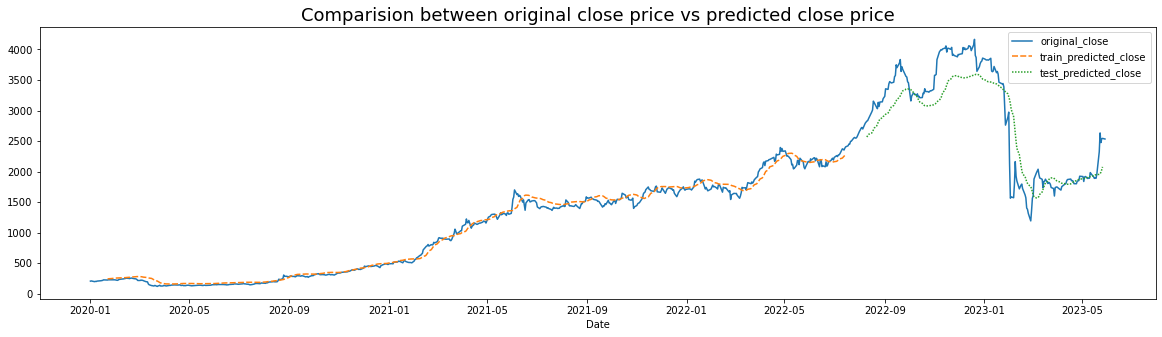

In [70]:
 # shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [71]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
 
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
 
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 31ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.5114814639091492], [0.5233206152915955], [0.5325098037719727], [0.5387678146362305], [0.5431827902793884], [0.5463539958000183], [0.5485789775848389], [0.5500380992889404], [0.551114022731781], [0.5516625642776489]]


In [72]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

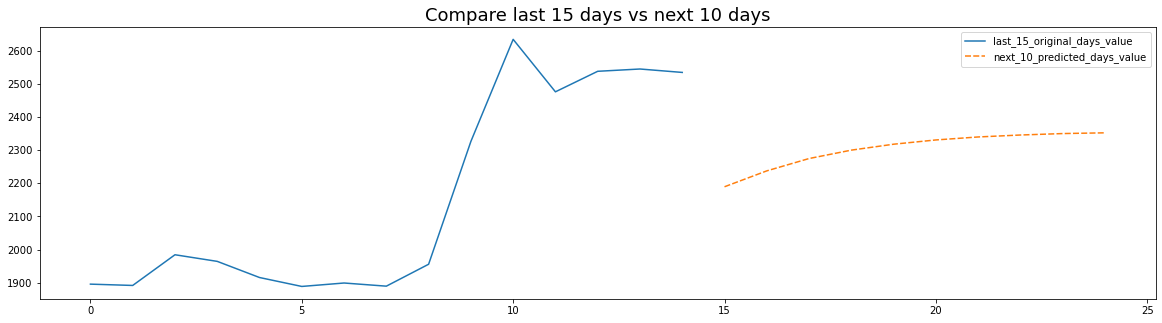

In [73]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()
# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
 'last_15_original_days_value':last_original_days_value,
 'next_10_predicted_days_value':next_predicted_days_value
})
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

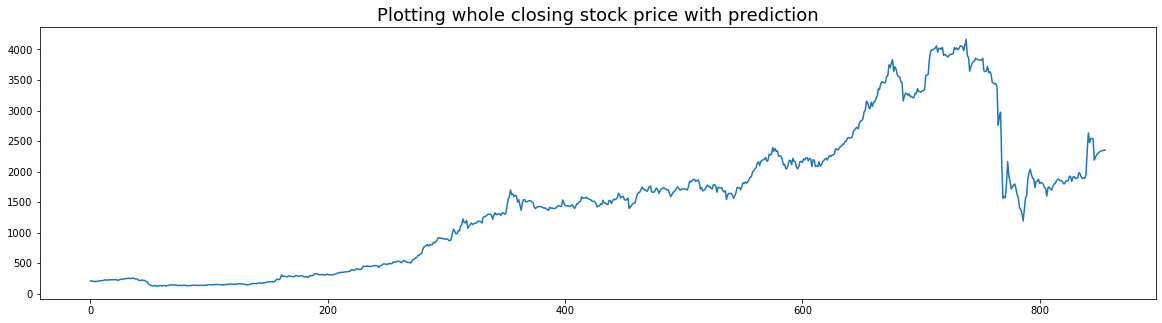

In [74]:
 # Creating list of close price
lstmdf=closedf.tolist()
# Adding next 10 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
plt.figure(figsize=(20,5))
sns.lineplot(data=lstmdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [75]:
model.save('lstm_model.h5')
lstm_model = tf.keras.models.load_model('lstm_model.h5')

In [76]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [77]:
 # reshape input to be [samples, time steps, features] which is required for LSTM
# GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (618, 15, 1)
X_test:  (196, 15, 1)


In [78]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
124/124 [==============================] - 25s 66ms/step - loss: 0.0040 - val_loss: 0.0059
Epoch 2/10
124/124 [==============================] - 5s 39ms/step - loss: 3.7065e-04 - val_loss: 0.0083
Epoch 3/10
124/124 [==============================] - 5s 39ms/step - loss: 2.9896e-04 - val_loss: 0.0047
Epoch 4/10
124/124 [==============================] - 5s 40ms/step - loss: 2.8974e-04 - val_loss: 0.0042
Epoch 5/10
124/124 [==============================] - 5s 41ms/step - loss: 2.6127e-04 - val_loss: 0.0060
Epoch 6/10
124/124 [==============================] - 5s 37ms/step - loss: 2.9291e-04 - val_loss: 0.0065
Epoch 7/10
124/124 [==============================] - 4s 35ms/step - loss: 3.2158e-04 - val_loss: 0.0033
Epoch 8/10
124/124 [==============================] - 5s 41ms/step - loss: 2.1881e-04 - val_loss: 0.0047
Epoch 9/10
124/124 [==============================] - 4s 34ms/step - loss: 2.3915e-04 - val_loss: 0.0025
Epoch 10/10
124/124 [==============================] - 4s 

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 [==============================] - 0s 8ms/step


((618, 1), (196, 1))

In [82]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [83]:
 # Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  53.915693810112785
Train data MSE:  2906.9020390258343
Test data MAE:  43.13681254464062
---------------------------------------------------------------------------------------------------------
Test data RMSE:  227.4241516448376
Test data MSE:  51721.744751374084
Test data MAE:  178.14969171018032
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9963445418875512
Test data explained variance regression score: 0.9543977445497236
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9945839086047972
Test data R2 score: 0.9370253618168699
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.019939840710009253
Test dat

Train predicted data:  (846, 1)
Test predicted data:  (846, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

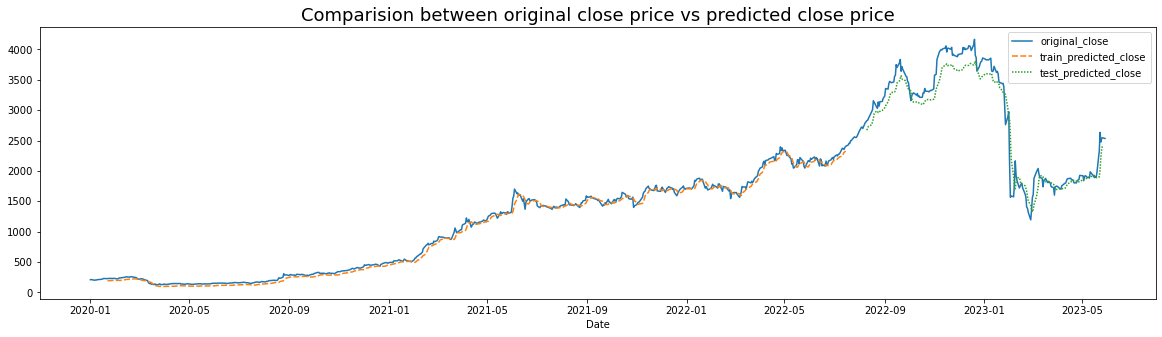

In [84]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [85]:
 # CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
         #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
 
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
 
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
 
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
 
        i=i+1
    
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 34ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.5840898752212524], [0.5812304019927979], [0.5767769813537598], [0.5722066164016724], [0.5677146911621094], [0.5633186101913452], [0.5590261816978455], [0.5548439621925354], [0.5507711172103882], [0.5468127727508545]]


In [86]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

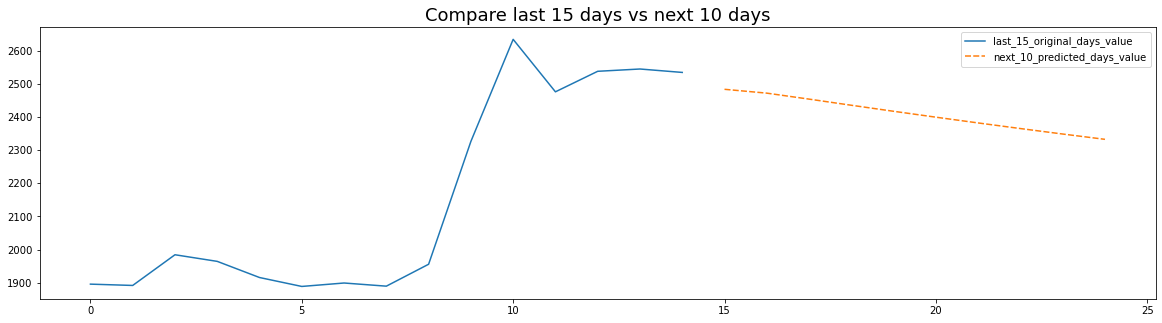

In [87]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()
# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
 'last_15_original_days_value':last_original_days_value,
 'next_10_predicted_days_value':next_predicted_days_value
})
plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

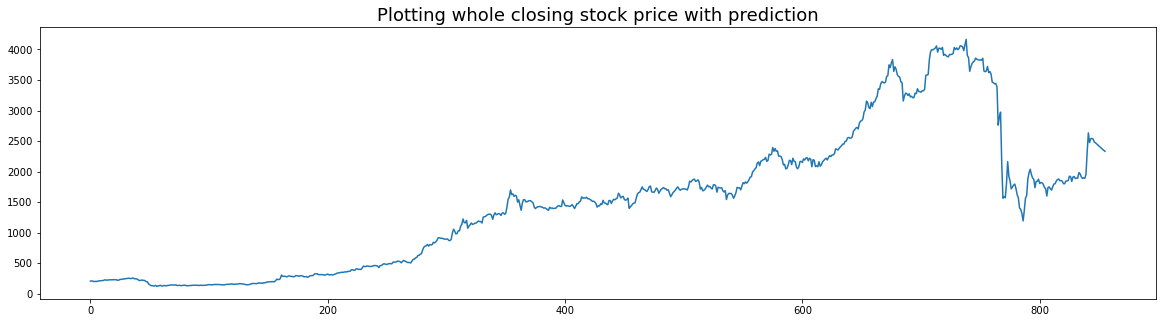

In [88]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]
plt.figure(figsize=(20,5))
sns.lineplot(data=grudf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [89]:
model.save('gru_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

In [90]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________
